### Assignment 1: Handling Missing Data in a Healthcare Dataset
Objective:
To analyze and clean a healthcare dataset by identifying and handling missing values using various imputation techniques.
Instructions:
Dataset Exploration:
Load the provided healthcare dataset.
Perform an initial exploratory data analysis (EDA) to understand the structure and missing values.
Identify Missing Data:
Use methods such as isna() and info() in Pandas to identify missing values.
Calculate the percentage of missing values for each column.
Analyze the Pattern of Missing Data:
Determine whether data is Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR).
Use visualization techniques like heatmaps (seaborn.heatmap()) to analyze missing patterns.
Impute Missing Values:
Use different imputation techniques:
Mean/Median/Mode imputation for numerical columns.
Mode imputation for categorical columns.
K-Nearest Neighbors (KNN) imputation.
Regression imputation (if applicable).
Compare the results of different imputation techniques.
Evaluate the Effect of Imputation:
Perform statistical analysis (mean, standard deviation) before and after imputation.
Visualize the impact using boxplots or histograms.
Report & Submission:	
Document the steps, analysis, and insights.
Provide a Jupyter Notebook with the implementation.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB

Summary Statistics:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.

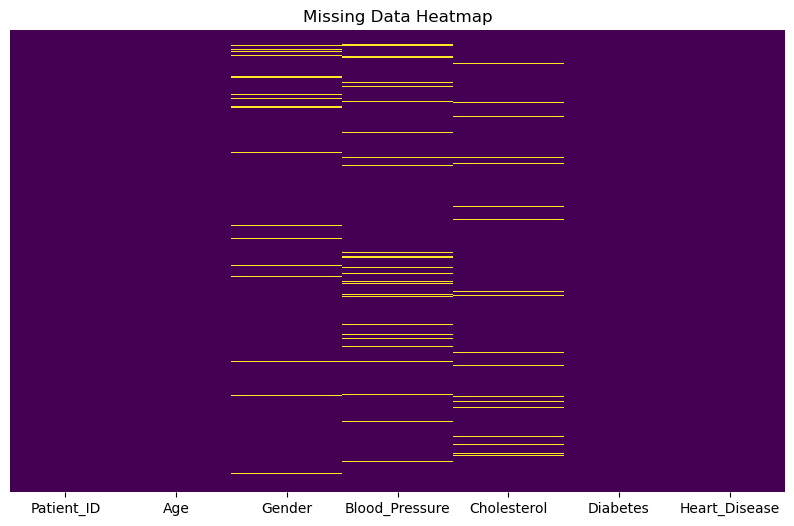

C:\Users\shsva\AppData\Local\Temp\ipykernel_21468\3995806264.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Median imputation for numerical columns
C:\Users\shsva\AppData\Local\Temp\ipykernel_21468\3995806264.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin


Statistics Before Imputation:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      505.000000   505.000000
mean   249.693069   52.918812      133.328713   200.728713
std    144.240508   21.064700       25.151976    57.374878
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      113.000000   151.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      153.000000   248.000000
max    500.000000   89.000000      179.000000   299.000000


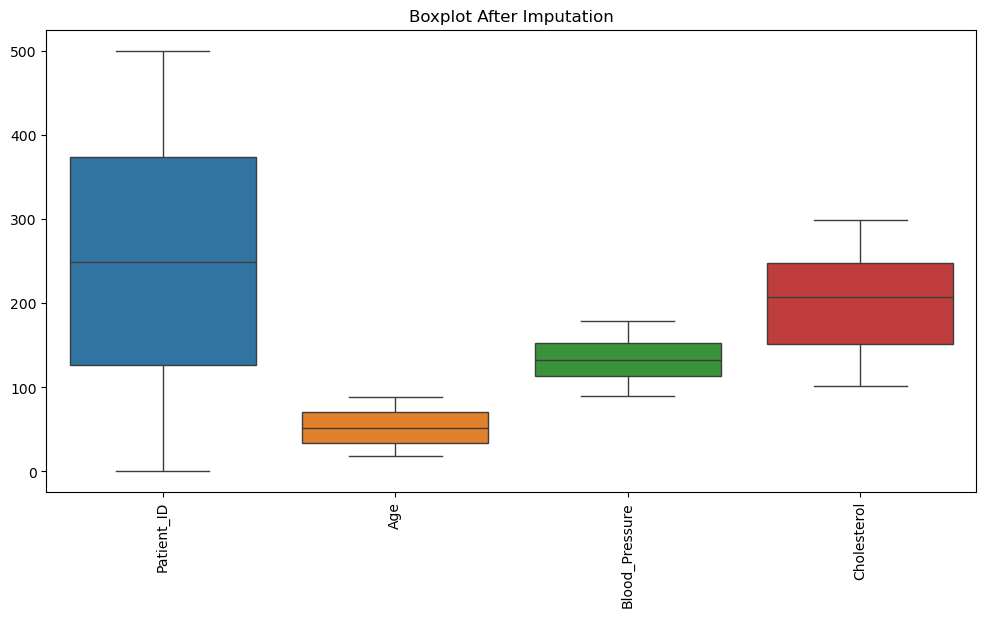

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv('Healthcare_Data.csv')

# Initial Exploration
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Identifying Missing Values
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Data:")
print(missing_data)

# Visualizing Missing Data
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Data
# Imputation with Mean/Median/Mode
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col].fillna(df[col].median(), inplace=True)  # Median imputation for numerical columns

for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)  # Mode imputation for categorical columns

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Evaluating Imputation Effects
print("\nStatistics Before Imputation:")
print(df.describe())

# Visualizing the Effect of Imputation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplot After Imputation")
plt.show()
